problem statement
---
Given the data of books and rating, Build a recommender system by using cosine similarity score

# Data Analysis

## Libraries

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

## Custom Functions

In [5]:
# defining a function to remove & sign from the Book.Title column

def clean_title(x):
    x=x
    x = re.sub(r'\&*amp', '',x).strip()
    x = re.sub(r"[^-a-zA-Z0-9_ :']",'',x) #'.?\\#$@()
    x = re.sub(r"[#'.?\\#$@()]",'',x)
    return x

def heading(title):
    print(f'\n \033[7m\033[1m\033[4m {title} \033[0m')

## Import Data

In [32]:
# import Data / read from CSV file, {note that there was trouble reading the file because of the exisistance of special char
#                                    This was an encoding issue while reading we used encodeing parms 'windows-1252'}

rawData = pd.read_csv('book.csv',encoding='windows-1252',usecols=[1,2,3])

rawData

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


## Descriptive statistics

In [34]:
print(rawData.info(),end='\n\n')
rawData.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB
None



,count,mean,std,min,25%,50%,75%,max
User.ID,10000.0,95321.2498,117645.703609,8.0,2103.0,3757.0,162052.0,278854.0
Book.Rating,10000.0,7.5663,1.821520,1.0,7.0,8.0,9.0,10.0


In [13]:
# Checking the count of the each ratings
heading('Number of rating for each unique value of ratings')
cleanData['Book.Rating'].value_counts()


  Number of rating for each unique value of ratings 


8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

In [44]:
# checking the range of rating. noted that range in 1 to 10 and ther are no 0 rating.
heading('All Possible Ratings are :  {}'.format(sorted(cleanData['Book.Rating'].unique())))

# Checking the no of unique values in user id column

heading('Number of users are      :  {}'.format(len(cleanData['User.ID'].unique())))


# checking the no of unique values in Book Title column

heading('Number of Titles are     :  {}'.format(len(cleanData['Book.Title'].unique())))


  All Possible Ratings are :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

  Number of users are      :  2182 

  Number of Titles are     :  9648 


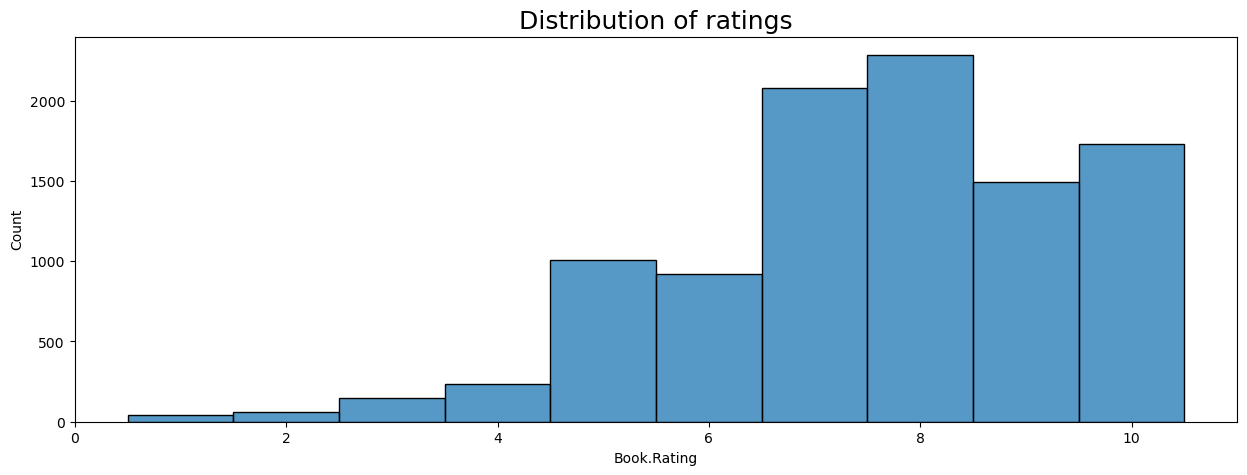

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(x=rawData['Book.Rating'],discrete=True)
plt.title('Distribution of ratings',fontsize = 18)
plt.show()

# Data Preparation

## Remove the unwanted characters from Book.Title

In [45]:
# calling the clean function to remove the & from the dataset

cleanData = rawData.copy(deep=True)
cleanData['Book.Title'] = rawData['Book.Title'].apply(clean_title)

heading('Book Titles after Cleaning')
cleanData.sort_values(by='Book.Title',ascending=True)


  Book Titles after Cleaning 


,User.ID,Book.Title,Book.Rating
3849,1248,01-01-00: A Novel of the Millennium,10
7747,3923,10 Commandments Of Dating,7
3656,1083,100 Great Fantasy Short Short Stories,10
8498,161041,1001 Brilliant Ways to Checkmate,10
2339,278806,101 Bright Ideas: Esl Activities for All Ages,9
...,...,...,...
2984,567,Zoot Suit and Other Plays,9
7784,3940,Zora Hurston and the Chinaberry Tree Reading R...,8
7227,3757,bermorgen,4
2385,278851,iI Paradiso Degli Orchi,7


## Pivot Table mapping User.ID, Book.Title and Book.Rating

In [15]:
# Creating a pivot Talbe using userid, booktitle, and rating
heading('Cross Table representing Rating given by each user for all books')
userRatingTble = cleanData.pivot_table(values='Book.Rating', index='User.ID', columns='Book.Title')
userRatingTble


  Cross Table representing Rating given by each user for all books 


Book.Title,01-01-00: A Novel of the Millennium,10 Commandments Of Dating,100 Great Fantasy Short Short Stories,1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,...,Zits Unzipped : Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5,Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree Reading Rainbow Book,bermorgen,iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


Normalize the Transformed data to avoid NaN issues.
---

### Check number of Ratings given by each user

In [17]:
heading('count of ratings by each user : ')
dict(userRatingTble.count(axis=1))


  count of ratings by each user :  


{8: 7,
 9: 1,
 10: 1,
 12: 1,
 14: 3,
 16: 1,
 17: 4,
 19: 1,
 22: 1,
 26: 2,
 32: 1,
 39: 2,
 42: 1,
 44: 1,
 51: 1,
 53: 4,
 56: 2,
 64: 1,
 67: 1,
 69: 3,
 70: 1,
 73: 1,
 75: 1,
 78: 1,
 81: 1,
 82: 1,
 83: 1,
 85: 1,
 86: 1,
 87: 2,
 88: 1,
 91: 1,
 92: 3,
 97: 1,
 99: 8,
 102: 1,
 107: 1,
 109: 1,
 110: 1,
 114: 8,
 125: 1,
 129: 1,
 133: 1,
 137: 1,
 141: 1,
 160: 6,
 162: 1,
 165: 3,
 169: 1,
 176: 1,
 178: 1,
 182: 1,
 183: 91,
 185: 1,
 190: 1,
 202: 1,
 212: 1,
 215: 1,
 217: 1,
 221: 1,
 224: 1,
 226: 1,
 228: 2,
 230: 1,
 232: 5,
 233: 1,
 242: 33,
 243: 18,
 244: 8,
 247: 1,
 249: 1,
 254: 58,
 256: 2,
 257: 2,
 269: 1,
 272: 4,
 273: 1,
 278: 1,
 280: 1,
 289: 2,
 291: 1,
 300: 8,
 302: 1,
 310: 1,
 313: 1,
 316: 1,
 323: 1,
 326: 1,
 332: 1,
 334: 2,
 337: 1,
 339: 1,
 345: 1,
 356: 1,
 361: 2,
 362: 4,
 367: 1,
 369: 1,
 372: 1,
 376: 2,
 382: 1,
 383: 8,
 387: 5,
 388: 17,
 392: 21,
 393: 2,
 406: 1,
 408: 5,
 413: 2,
 424: 6,
 430: 1,
 431: 1,
 432: 1,
 433: 2,
 440:

### Calculate Average of each row (Average Rating given by Each user)

In [46]:
# get the average rating given by each user
heading('Average rating given by each user accross all movies')
avg_rating = userRatingTble.mean(axis = 1)
print(avg_rating)


  Average rating given by each user accross all movies 
User.ID
8          5.571429
9          6.000000
10         6.000000
12        10.000000
14         5.333333
            ...    
278846     8.000000
278849     9.000000
278851     6.500000
278852     8.000000
278854     7.000000
Length: 2182, dtype: float64


### User Rating Table Centered to the mean

In [18]:
# Substract the average to normalize and round the data in each cell of the pivot table
heading('CENTERED USER RATINGS TABLE')
centered_userRatingTble = np.round(userRatingTble.sub(avg_rating, axis=0),0)
centered_userRatingTble


  CENTERED USER RATINGS TABLE 


Book.Title,01-01-00: A Novel of the Millennium,10 Commandments Of Dating,100 Great Fantasy Short Short Stories,1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,...,Zits Unzipped : Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5,Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree Reading Rainbow Book,bermorgen,iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


### Imputing the number "0" in place of NULL (NaN) Values

In [20]:
# fill 0 in place of NaN values for futher processing

centered_userRatingTble.fillna(0,inplace=True)
heading('CENTERED RATINGS TABLE AFTER IMPUTING "0" INPLACE OF "NaN" VALUES')
centered_userRatingTble


  CENTERED RATINGS TABLE AFTER IMPUTING "0" INPLACE OF "NaN" VALUES 


Book.Title,01-01-00: A Novel of the Millennium,10 Commandments Of Dating,100 Great Fantasy Short Short Stories,1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,...,Zits Unzipped : Sketchbook 5 Scott Jerry Zits Collection Sketchbook No 5,Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree Reading Rainbow Book,bermorgen,iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generate user similarity matrix
---

In [22]:
# import cosine_similarity from sklearn pairwise

from sklearn.metrics.pairwise import cosine_similarity

### Calculate similarities using Cosine Similarity Function from SKlearn Library

In [23]:
# apply cosine_similarity on cent_useruserDf and round the resulting values to 3 decimal places

similarities = np.round(cosine_similarity(centered_userRatingTble),3)
heading('Similarites')
similarities


  Similarites 


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
heading('Shape of Similarities array is : {}'.format(similarities.shape))


  Shape of Similarities array is : (2182, 2182) 


### Make USER-USER similarity table

In [25]:
# creating useruser similarity matrix

userSimilaritydf = pd.DataFrame(similarities,
                                index=centered_userRatingTble.index,
                                columns=centered_userRatingTble.index)
heading('User-User Similarity Table')
userSimilaritydf


  User-User Similarity Table 


User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Custom Function for Querying and making Recommendation

## Calculating Similar Users

In [26]:
# Define a function to select n users from the similarity matrix against specific users who are similer to the specified user.

def similar_users(user, n):
    # Find the similarity scores for user_1 with all other users and sort them
    user_similarity_series = userSimilaritydf.loc[user]
    ordered_similarities = user_similarity_series.sort_values(ascending=False)
    nearest_neighbors = ordered_similarities[1:n].index
    return list(nearest_neighbors)
#     nearest_neighbors_score = ordered_similarities[1:n]
#     return pd.DataFrame({'UserId': list(nearest_neighbors),"SimilarityScore" : list(nearest_neighbors_score)})

## Calculating Average Rating given by similar users

In [27]:
# Define a function to get the average rating given by the selected no of user for any given book

def avg_neighbor_ratings(Book, user_list):
    # Extract the ratings of the neighbors
    neighbor_ratings = userRatingTble.reindex(user_list)
    avg_ratings = np.round(neighbor_ratings[Book].mean(),2)
    return avg_ratings

## Making Recommendations to Similar user based on their average Scores

In [28]:
# Define a function to check if the perticular book can be recomended to a specific user, by nesting the other two function

def recommend_movie(user, Book):
    num_of_neighbors = 10
    neighbors = similar_users(user,num_of_neighbors)
    ## Get the average ratings given by similar users for a particular movie
    avg_ratings = avg_neighbor_ratings(Book, neighbors)
    print("The average rating given by similar users for the movie '{0}' is {1}".format(Book,avg_ratings), '\n\n','Hence','\n')
    if avg_ratings > 3.5 :
        print("The user-user model recommends '{0}' to user {1}".format(Book,user ))
    else:
        print("The user-user model does not recommend '{0}' to user {1}".format(Book,user )) 

# Testing the Recommendations

## Testing on user id "2591" for book "10 Commandments Of Dating"

In [29]:
# Test the function by passing the parameters

recommend_movie(user=2591,Book='10 Commandments Of Dating')

The average rating given by similar users for the movie '10 Commandments Of Dating' is nan 

 Hence 

The user-user model does not recommend '10 Commandments Of Dating' to user 2591


## Testing on user id "14" for book "48"

In [31]:
recommend_movie(user=14,Book="48")

The average rating given by similar users for the movie '48' is nan 

 Hence 

The user-user model does not recommend '48' to user 14
